# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [8]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix for the training data
    covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]
    
    # Step 2: Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Ensure real values for stability
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    
    # Step 3: Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top n_components eigenvectors (principal components)
    principal_components = sorted_eigenvectors[:, :n_components]
    
    # Step 5: Project the training data onto the principal components
    X_train_reduced = np.dot(X_train, principal_components)
    
    # Step 6: Project the test data onto the same principal components
    X_test_reduced = np.dot(X_test, principal_components)
    
    return X_train_reduced, X_test_reduced, sorted_eigenvectors




## Part 3: Train Logistic Regression and Measure Performance

In [9]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [10]:
svd_components = [50, 100, 150, 200, 300, 400, 500, 600, 700, 784] 
results = []

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd,sorted_eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Display results
for res in results:
    print(f"Components: {res[0]}, Accuracy: {res[1]:.4f}, Training time: {res[2]:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 10.8713 seconds
Applying custom SVD with 100 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 49.2545 seconds
Applying custom SVD with 150 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 152.4942 seconds
Applying custom SVD with 200 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 111.7842 seconds
Applying custom SVD with 300 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 260.5415 seconds
Applying custom SVD with 400 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9195, Training time: 699.1067 seconds
Applying custom SVD with 500 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 556.3803 seconds
Applying custom SVD with 600 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 600, Accuracy: 0.9205, Training time: 1374.9432 seconds
Applying custom SVD with 700 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 700, Accuracy: 0.9209, Training time: 635.7588 seconds
Applying custom SVD with 784 components...


c:\Users\cicil\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 1444.6369 seconds
Components: 50, Accuracy: 0.9085, Training time: 10.8713 seconds
Components: 100, Accuracy: 0.9181, Training time: 49.2545 seconds
Components: 150, Accuracy: 0.9198, Training time: 152.4942 seconds
Components: 200, Accuracy: 0.9206, Training time: 111.7842 seconds
Components: 300, Accuracy: 0.9205, Training time: 260.5415 seconds
Components: 400, Accuracy: 0.9195, Training time: 699.1067 seconds
Components: 500, Accuracy: 0.9205, Training time: 556.3803 seconds
Components: 600, Accuracy: 0.9205, Training time: 1374.9432 seconds
Components: 700, Accuracy: 0.9209, Training time: 635.7588 seconds
Components: 784, Accuracy: 0.9209, Training time: 1444.6369 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


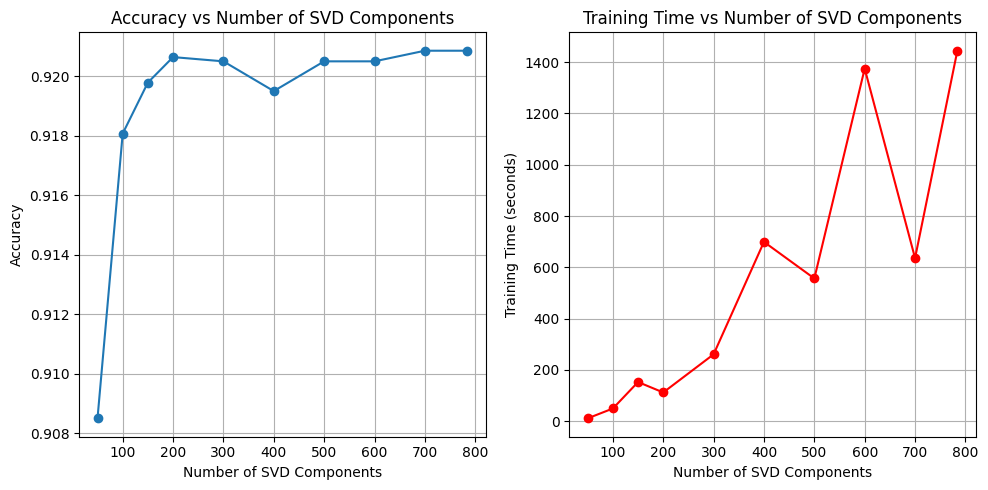

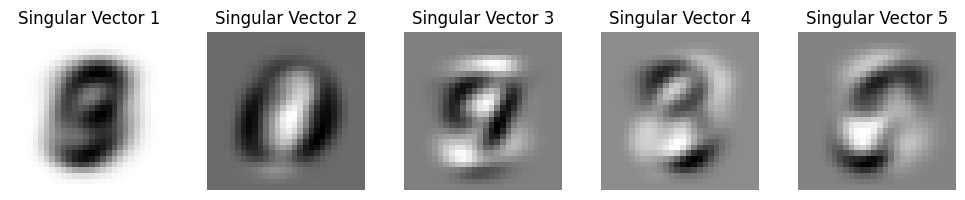

In [11]:
import matplotlib.pyplot as plt

# Extract data from results
components = [res[0] for res in results]
accuracies = [res[1] for res in results]
training_times = [res[2] for res in results]

# Plot accuracy vs number of components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training time vs number of components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='r')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()
# Function to visualize top singular vectors
def visualize_top_singular_vectors(sorted_eigenvectors, n=5):
    top_vectors = sorted_eigenvectors[:, :n]  # Select top n singular vectors

    plt.figure(figsize=(10, 2))
    for i in range(n):
        singular_vector = top_vectors[:, i].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(1, n, i + 1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f"Singular Vector {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming sorted_eigenvectors is from the apply_svd_custom() function
visualize_top_singular_vectors(sorted_eigenvectors, n=5)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

#Accuracy v.s. Number of SVD Components:

The graph shows that accuracy improves initially as the number of SVD components increases, reaching a peak at around 200-300 components.
After this, the accuracy plateaus and slightly decreases as the number of components increases further (300-400). This indicates that 200-300 components might capture the most relevant features of the MNIST dataset without adding unnecessary complexity.
Using more than 200 components seems to introduce redundant or less informative features, which might explain the slight drop in accuracy.

#Training time v.s. Number of SVD Components:

The training time increases non-linearly with the number of SVD components. The training time starts relatively low for a small number of components (below 100), but there are significant spikes at 400, 500, and 800 components.
A sharp increase in training time can be seen as the number of components increases beyond 400. This suggests that as more dimensions are added, the complexity of training the logistic regression model rises significantly, which is expected because the model has more data to process.

#Singular Vector 5:

The singular vectors show the most important features the model extracts from the data:
Singular Vector 1 captures general outlines of digits, focusing on common structures across digits.
Singular Vectors 2 to 5 start to highlight more specific features like distinct shapes of particular digits (e.g., parts of 0, 7, 3).
These visualizations help demonstrate how SVD captures the most significant variance in the dataset, with the first few singular vectors representing global features and later vectors capturing more detailed patterns.

#Conclusion:

Optimal Number of Components: Based on both accuracy and training time, 200-300 components seems to be the optimal range for this task. It provides a good balance between performance and computational efficiency.
Dimensionality Reduction Trade-off: Reducing dimensionality via SVD improves both computational efficiency and model performance up to a certain point. However, adding too many components beyond a certain threshold introduces diminishing returns.
Singular Vectors Insight: The first few singular vectors effectively capture the global structure of the digits, making them crucial for dimensionality reduction.